In [1]:
import pandas as pd
from scipy.stats import stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_frame = pd.read_csv('student_performance.csv')

In [4]:
data_frame
data_frame.columns.values[0] = 'Maths_Score'
data_frame.columns.values[1] = 'English_Score'
data_frame.columns.values[2] = 'Passed'
data_frame.columns.values[3] = 'Gender'
data_frame.columns.values[4] = 'Roll_Number'
data_frame.columns.values[5] = 'Hours Studied'

In [5]:
data_frame

,Maths_Score,English_Score,Passed,Gender,Roll_Number,Hours Studied
0,11.4,65,Yes,Female,2,49
1,6.4,83,Yes,Male,3,77
2,12.0,73,Yes,Male,4,63
3,7.1,49,Yes,Male,5,70
4,12.4,75,Yes,Female,6,47
...,...,...,...,...,...,...
94,12.8,78,Yes,Female,96,67
95,16.4,88,Yes,Female,97,58
96,13.1,91,No,Female,98,70
97,5.4,71,Yes,Female,99,72


In [10]:
data_frame['Efficiency'] = (data_frame['Maths_Score'] + data_frame['English_Score']) / data_frame['Hours Studied']


In [11]:
data_frame

,Maths_Score,English_Score,Passed,Gender,Roll_Number,Hours Studied,Efficiency
0,11.4,65,Yes,Female,2,49,1.559184
1,6.4,83,Yes,Male,3,77,1.161039
2,12.0,73,Yes,Male,4,63,1.349206
3,7.1,49,Yes,Male,5,70,0.801429
4,12.4,75,Yes,Female,6,47,1.859574
...,...,...,...,...,...,...,...
94,12.8,78,Yes,Female,96,67,1.355224
95,16.4,88,Yes,Female,97,58,1.800000
96,13.1,91,No,Female,98,70,1.487143
97,5.4,71,Yes,Female,99,72,1.061111


In [21]:
data_frame['Efficiency'] = data_frame['Efficiency'].fillna(0)

sorted(data_frame['Efficiency'])
quantile1, quantile3= np.percentile(data_frame['Efficiency'],[25,75])

In [22]:
iqr_value=quantile3-quantile1
print(iqr_value)

0.7188034138055044


In [24]:
lower_bound_val = quantile1 -(1.5 * iqr_value)
upper_bound_val = quantile3 +(1.5 * iqr_value)

In [27]:
lower_bound_val

np.float64(-0.20312807910579123)

In [28]:
upper_bound_val

np.float64(2.6720855761162263)

In [29]:
no_outlier = data_frame[(data_frame['Efficiency'] < upper_bound_val) & (data_frame['Efficiency'] > lower_bound_val)]

In [30]:
no_outlier

,Maths_Score,English_Score,Passed,Gender,Roll_Number,Hours Studied,Efficiency
0,11.4,65,Yes,Female,2,49,1.559184
1,6.4,83,Yes,Male,3,77,1.161039
2,12.0,73,Yes,Male,4,63,1.349206
3,7.1,49,Yes,Male,5,70,0.801429
4,12.4,75,Yes,Female,6,47,1.859574
...,...,...,...,...,...,...,...
94,12.8,78,Yes,Female,96,67,1.355224
95,16.4,88,Yes,Female,97,58,1.800000
96,13.1,91,No,Female,98,70,1.487143
97,5.4,71,Yes,Female,99,72,1.061111


In [38]:
data_frame.shape

(99, 7)

In [39]:
no_outlier.shape

(95, 7)

In [40]:
print("Four rows are removed")

Four rows are removed


In [42]:
from scipy.stats import chi2_contingency

table = pd.crosstab(data_frame['Gender'], data_frame['Passed'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")


Chi2 Statistic: 0.646569014457304
p-value: 0.42134202386789776


In [46]:
if p < 0.05:
  print("Relation Exist")
else:
  print("No Relation")

No Relation


/tmp/ipython-input-47-1673440238.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([male_eff, female_eff], labels=['Male', 'Female'])


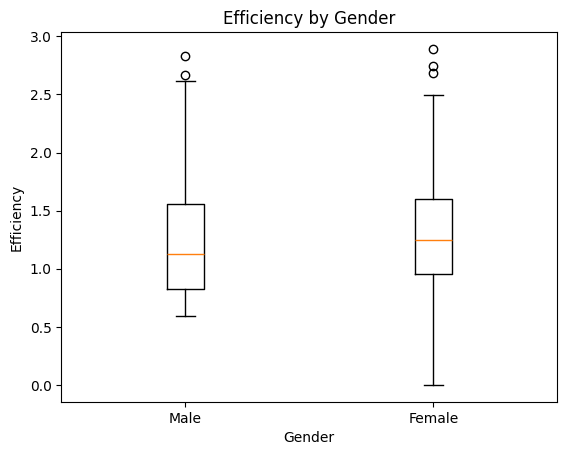

In [47]:
import matplotlib.pyplot as plt

# Prepare data
male_eff = data_frame[data_frame['Gender'] == 'Male']['Efficiency'].dropna()
female_eff = data_frame[data_frame['Gender'] == 'Female']['Efficiency'].dropna()

# Plot
plt.boxplot([male_eff, female_eff], labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Efficiency')
plt.title('Efficiency by Gender')
plt.show()

In [49]:
#Observations
#Efiiciency of Male is incresing from low to high
#Efficiency of Female is incresing from moderate to high
#Females are more efficient than males according to the box plot